In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Energy_consumption_dataset.csv')

In [7]:
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [9]:
df.describe()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.588687,6.888306,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,6.000000,11.000000,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,9.000000,18.000000,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [10]:
monthly_average_consumption = df.groupby('Month')['EnergyConsumption'].mean().reset_index()
monthly_average_consumption

,Month,EnergyConsumption
0,1,76.945109
1,2,77.377782
2,3,76.990937
3,4,77.585987
4,5,76.202260
5,6,75.659264
6,7,77.251289
7,8,76.560807
8,9,75.897811
9,10,76.678556


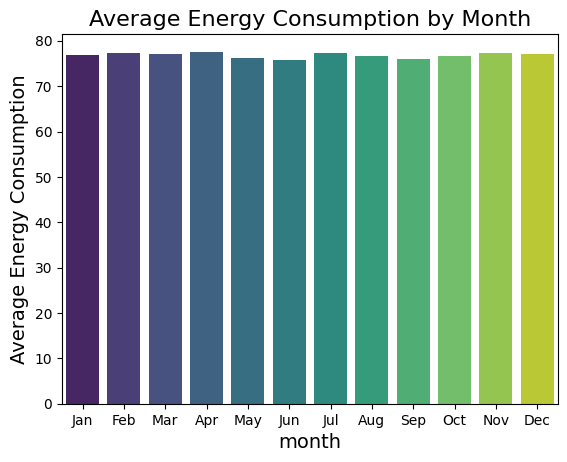

In [11]:
#BarPlot
sns.barplot(x='Month', y='EnergyConsumption', data= monthly_average_consumption, palette='viridis')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

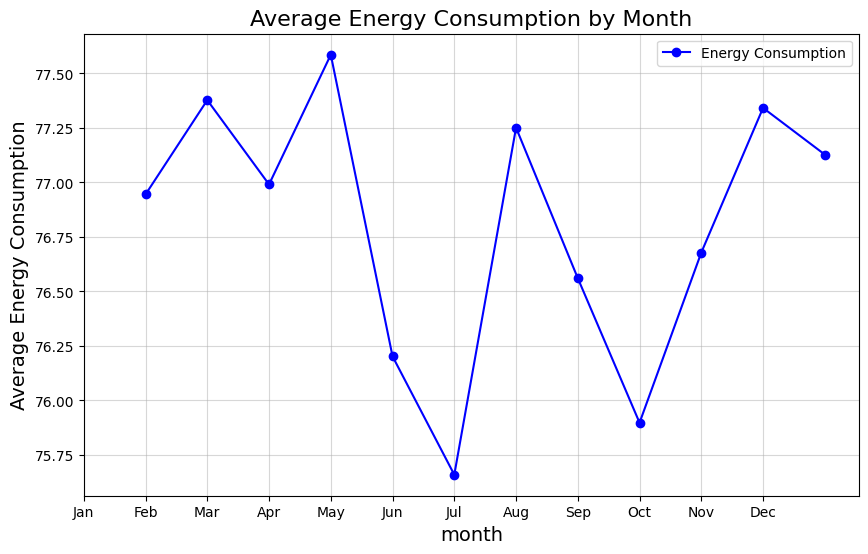

In [12]:
#Line Chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_average_consumption['Month'],
         monthly_average_consumption['EnergyConsumption'],
         marker='o', color='b', label='Energy Consumption')
plt.title('Average Energy Consumption by Month', fontsize=16)
plt.xlabel('month', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [13]:
def get_season(month):
  if month in [3, 4, 5]:
    return 'Summer'
  elif month in [6, 7, 8]:
    return 'Monsoon'
  elif month in [9, 10, 11]:
    return 'Autumn'
  else:
    return 'Winter'

df['Season'] = df['Month'].apply(get_season)
df = df.drop('Month', axis=1)
columns = ['Season'] + [col for col in df.columns if col != 'Season']
df = df[columns]

In [14]:
df.Season.value_counts()

,count
Season,
Winter,1400
Summer,1200
Monsoon,1200
Autumn,1200


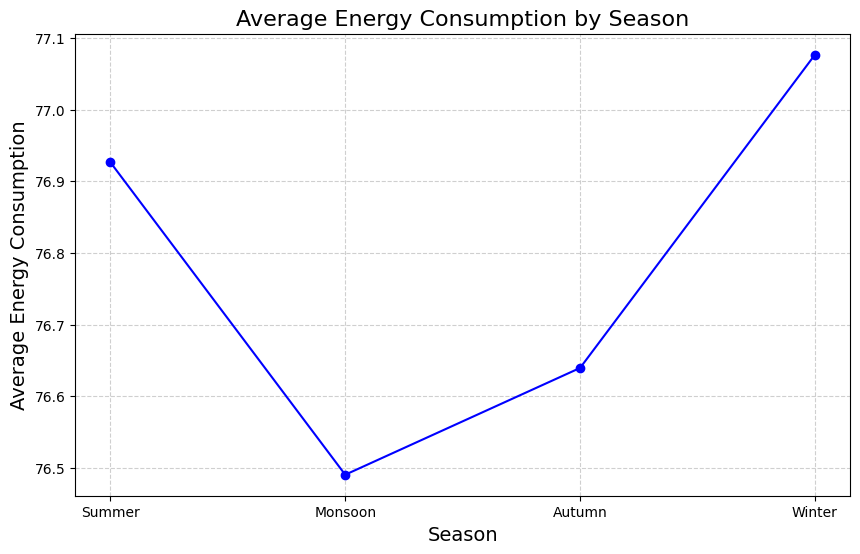

In [19]:
season_avg_consumption =  df.groupby('Season')['EnergyConsumption'].mean().reset_index()

# define order of season
season_order = ['Summer', 'Monsoon', 'Autumn', 'Winter']
season_avg_consumption['Season'] = pd.Categorical(season_avg_consumption['Season'],  categories=season_order, ordered=True)
season_avg_consumption = season_avg_consumption.sort_values('Season')

# Line Chart
plt.figure(figsize=(10, 6))
plt.plot(season_avg_consumption['Season'],
         season_avg_consumption['EnergyConsumption'],
         marker='o', color='b', linestyle='-')
plt.title('Average Energy Consumption by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(alpha=0.6, visible=True, linestyle='--')
plt.show()

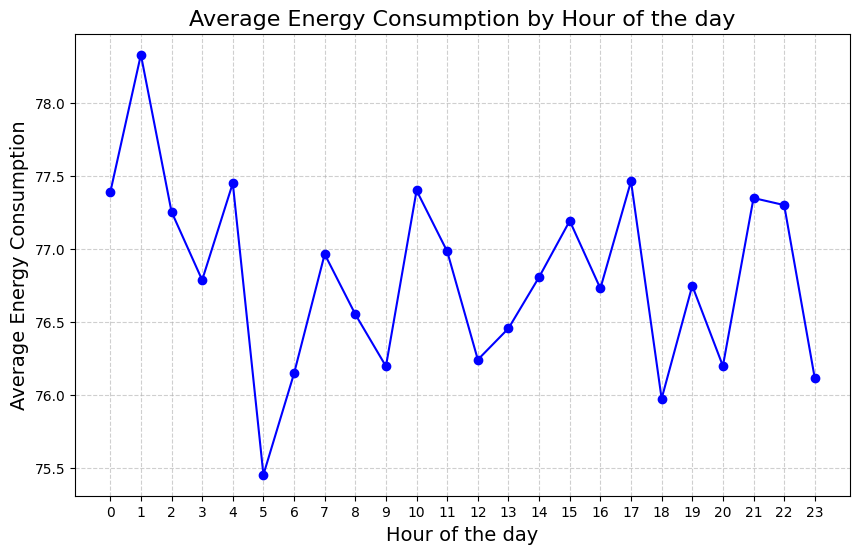

In [22]:
hour_avg_consumption =  df.groupby('Hour')['EnergyConsumption'].mean().reset_index()

# Line Chart
plt.figure(figsize=(10, 6))
plt.plot(hour_avg_consumption['Hour'],
         hour_avg_consumption['EnergyConsumption'],
         marker='o', color='b', linestyle='-')
plt.title('Average Energy Consumption by Hour of the day', fontsize=16)
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(alpha=0.6, visible=True, linestyle='--')
plt.show()

In [23]:
def get_time_of_day(hour):
  if 4 <= hour <= 12:
    return 'Morning'
  elif 12 <= hour <= 16:
    return 'Afternoon'
  elif 16 <= hour <= 21:
    return 'Evening'
  else:
    return 'Night'

df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)
df = df.drop('Hour', axis=1)
columns = ['Season', 'TimeOfDay'] + [col for col in df.columns if col not in ['Season', 'TimeOfDay']]
df = df[columns]

In [24]:
df.head()

,Season,TimeOfDay,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,Winter,Night,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,Winter,Night,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,Winter,Night,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,Winter,Night,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,Winter,Morning,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


<Axes: ylabel='count'>

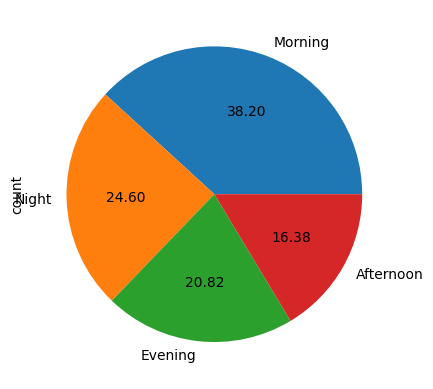

In [25]:
df.TimeOfDay.value_counts().plot(kind='pie', autopct='%.2f')

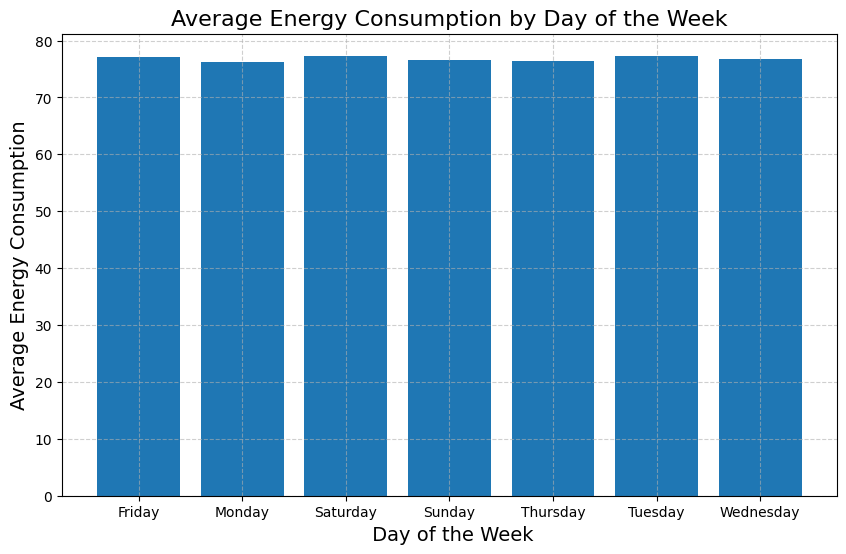

In [27]:
dayofweek_avg_consumption =  df.groupby('DayOfWeek')['EnergyConsumption'].mean().reset_index()

# sort the day of week
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_avg_consumption['DayOfWeek'] = pd.Categorical(dayofweek_avg_consumption['DayOfWeek'],  categories=dayofweek_order, ordered=True)
season_avg_consumption = season_avg_consumption.sort_values('Season')

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(dayofweek_avg_consumption['DayOfWeek'],
         dayofweek_avg_consumption['EnergyConsumption'])
plt.title('Average Energy Consumption by Day of the Week', fontsize=16)
plt.xlabel(' Day of the Week', fontsize=14)
plt.ylabel('Average Energy Consumption', fontsize=14)
plt.grid(alpha=0.6, visible=True, linestyle='--')
plt.show()

In [28]:
df.drop('DayOfWeek', axis=1, inplace=True)

In [29]:
categorical_features = ['Season', 'TimeOfDay', 'Holiday', 'HVACUsage', 'LightingUsage']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,Season_Monsoon,Season_Summer,Season_Winter,TimeOfDay_Evening,TimeOfDay_Morning,TimeOfDay_Night,Holiday_Yes,HVACUsage_On,LightingUsage_On
0,25.139433,43.431581,1565.693999,5,2.774699,75.364373,False,False,True,False,False,True,False,True,False
1,27.731651,54.225919,1411.064918,1,21.831384,83.401855,False,False,True,False,False,True,False,True,True
2,28.704277,58.907658,1755.715009,2,6.764672,78.270888,False,False,True,False,False,True,False,False,False
3,20.080469,50.371637,1452.316318,1,8.623447,56.519850,False,False,True,False,False,True,False,False,True
4,23.097359,51.401421,1094.130359,9,3.071969,70.811732,False,False,True,False,True,False,False,True,False


In [30]:
X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
import  tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [40]:
model  = Sequential()
model.add(Dense(32, activation='relu', input_dim=14))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation= 'relu'))
model.add(Dense(1, activation='linear'))

In [41]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import Huber
model.compile(loss=Huber(), optimizer=RMSprop(learning_rate=0.001), metrics=['mae'])

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test), batch_size=32, verbose=1)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 71.5196 - mae: 72.0196 - val_loss: 44.4390 - val_mae: 44.9390
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 29.3455 - mae: 29.8432 - val_loss: 10.3671 - val_mae: 10.8559
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.0127 - mae: 11.5036 - val_loss: 9.1910 - val_mae: 9.6799
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.0180 - mae: 10.5059 - val_loss: 8.4362 - val_mae: 8.9251
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2819 - mae: 9.7702 - val_loss: 7.9248 - val_mae: 8.4124
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1175 - mae: 9.6043 - val_loss: 7.5398 - val_mae: 8.0243
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.5703 - mae: 9.0593 - val_loss: 7.1601 - val_mae: 7.6461
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.0470 - mae: 8.5332 - val_loss: 6.8287 - val_mae: 7.3129
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3

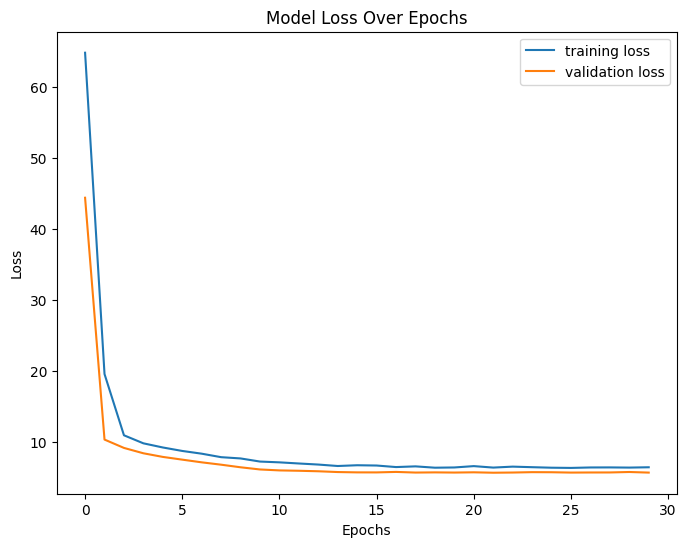

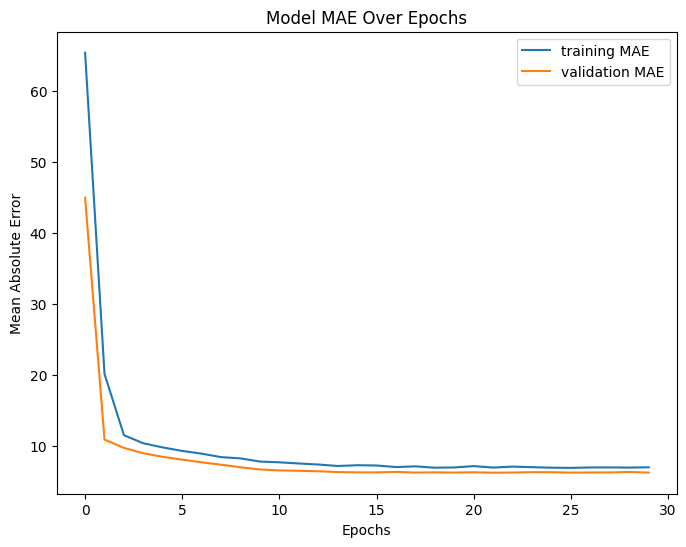

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(history.history['mae'], label='training MAE')
plt.plot(history.history['val_mae'], label='validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [45]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8900 - mae: 6.3771
Test Loss: 5.7148
Test MAE: 6.1979


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


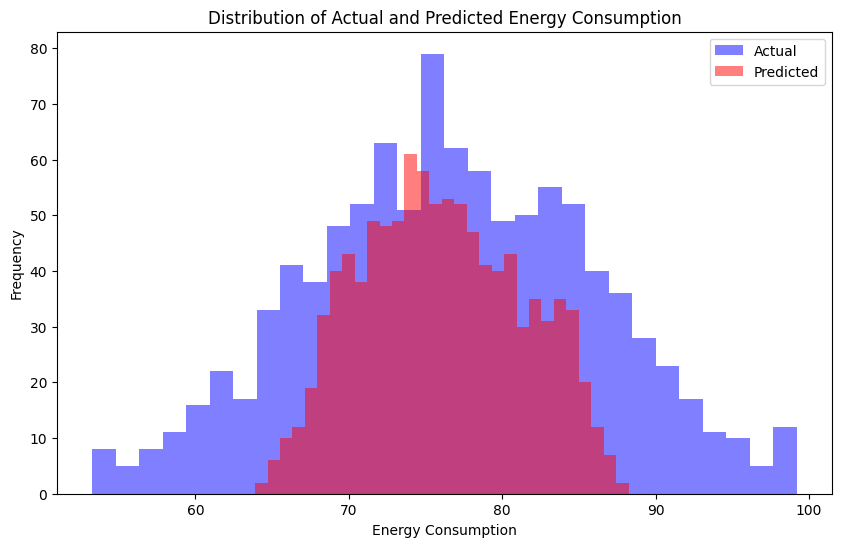

In [50]:
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual', color='blue')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted', color='red')
plt.title('Distribution of Actual and Predicted Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

MAE: 6.1979
MSE: 61.2254
RMSE: 7.8247
R2 Score: 0.2950
